# Tour de France stages since 1903

We would like to analyze some attributes of the Tour de France stages since the very first Tour de France in 1903.
The first step will be to retrieve the data and generate a big dataframe out of it.

We create a list of years from 1903 to this year and exclude the years where the Tour de France did not take place.

In [1]:
%matplotlib inline

import pandas as pd
import re
import datetime
import wikipedia
import pickle
from dateutil.parser import parse
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

years = [y for y in range(1903, datetime.date.today().year + 1)]

# No TdF (World War I)
for y in range(1915, 1919):
    years.remove(y)

# No TdF (World War II)
for y in range(1940, 1947):
    years.remove(y)

The function `extract_dataframe` tries to extract the relevant table with the data about the stages from a HTML document.

In [2]:
def extract_dataframe(html):
    dfs = pd.read_html(html)
    for df in dfs:
        names = list(df.T[0])
        keywords = ('Stage', 'Distance')
        for keyword in keywords:
            if keyword not in names:
                break
        else:
            return df
    return None

The function `extract_wiki_html` downloads the Tour de France Wikipedia article of a given year and returns its HTML content.

In [3]:
def extract_wiki_html(year):
    wikipage_string = str(year) + '_Tour_de_France'
    page = wikipedia.page(wikipage_string)
    return page.html()

In [4]:
download_data = True
from tqdm import tqdm_notebook

dfs_dict = {}

if download_data:
    for year in tqdm_notebook(years):
        html = extract_wiki_html(year)
        df = extract_dataframe(html)
        dfs_dict[year] = df

You can set the variable `save_data` to `True`, if you want to save the downloaded data to disk.

In [5]:
save_data = False
if save_data:
    with open('tdf_data.pkl', 'wb') as f:
        pickle.dump(dfs_dict, f, pickle.HIGHEST_PROTOCOL)

Set the variable `load_data` to `True`, if you want to load previously saved data.

In [6]:
load_data = False
if load_data:
    with open('tdf_data.pkl', 'rb') as f:
        dfs_dict = pickle.load(f)

In [7]:
def generate_big_dataframe(dfs_dict):
    df_dict = {
        'Year': [],
        'Date': [],
        'Stage': [],
        'Course': [],
        'Distance': [],
        'Type': [],
        'Winner': [],
    }

    for year, df in dfs_dict.items():
        last_date = None
        for index, row in df.iterrows():
            if type(row[0]) != float and row[0] != 'Stage':
                ind = 0
                #stage = row[ind]
                df_dict['Year'].append(str(year))
                df_dict['Stage'].append(row[ind])
                date_str = row[ind+1] + ' ' + str(year)
                
                try:
                    date = parse(date_str)
                    last_date = date
                except ValueError:
                    date = last_date
                    ind -= 1
                df_dict['Date'].append(date)
                
                course = row[ind+2]
                df_dict['Course'].append(row[ind+2])
                distance_str = row[ind+3]
                distance_regex = r'(?P<dist>\d+(\.\d+)?)\s*km'
                m = re.match(distance_regex, distance_str)
                if not m:
                    print(f'Warning: Unable to match distance regex in row {index}.')
                    continue
                km_str = m.group('dist')
                distance = float(km_str)
                df_dict['Distance'].append(distance)
                
                df_dict['Type'].append(row[ind+5])
                df_dict['Winner'].append(row[ind+6])

    big_dataframe = pd.DataFrame(df_dict)
    return big_dataframe
                

We generate a big dataframe out of the data we collected of each year's Tour de France:

In [8]:
df = generate_big_dataframe(dfs_dict)

In [9]:
pd.options.display.max_rows = None
display(df)

,Year,Date,Stage,Course,Distance,Type,Winner
0,1903,1903-07-01,1,Paris to Lyon,467.000,Plain stage,Maurice Garin (FRA)
1,1903,1903-07-05,2,Lyon to Marseille,374.000,Stage with mountain(s),Hippolyte Aucouturier (FRA)
2,1903,1903-07-08,3,Marseille to Toulouse,423.000,Plain stage,Hippolyte Aucouturier (FRA)
3,1903,1903-07-12,4,Toulouse to Bordeaux,268.000,Plain stage,Charles Laeser (SUI)
4,1903,1903-07-13,5,Bordeaux to Nantes,425.000,Plain stage,Maurice Garin (FRA)
5,1903,1903-07-18,6,Nantes to Paris,471.000,Plain stage,Maurice Garin (FRA)
6,1904,1904-07-02,1,Montgeron to Lyon,467.000,Plain stage,Maurice Garin (FRA)
7,1904,1904-07-09,2,Lyon to Marseille,374.000,Stage with mountain(s),Hippolyte Aucouturier (FRA)
8,1904,1904-07-13,3,Marseille to Toulouse,424.000,Plain stage,Hippolyte Aucouturier (FRA)
9,1904,1904-07-17,4,Toulouse to Bordeaux,268.000,Plain stage,Lucien Pothier (FRA)


We write a test function to check the extracted data for unexpected entries:

In [10]:
def check_dataframe(df):
    issues = []
    for index, row in df.iterrows():
        year = int(row['Year'])
        if not (year >= 1903 and year <= datetime.date.today().year):
            issues.append(f'Row {index}: Value of year is {year}, it is not in the expected range.')
        ts = row['Date']
        
        td = datetime.date.today()
        if not (ts >= pd.Timestamp(1903, 7, 1) and ts <= pd.Timestamp(td.year, 12, 31)):
            issues.append(f'Row {index}: Date is {ts}, it is not in the expected range.')
        dist = row['Distance']
        if not (dist >= 1.0 and dist <= 500.0):
            issues.append(f'Row {index}: Distance is {dist}, it is not in the expected range.')
        stage_type = row['Type']
        stage_types = (r'Plain (S|s)tage', r'Stage with mountain(\(s\)|s)?',
                       r'Mountain time trial',
                       r'Individual time trial', r'Team time trial', 
                       r'Hilly (S|s)tage', r'Plain (S|s)tage with cobblestones',
                       r'((Medium|High)\s)?(M|m)ountain(\s(S|s)tage)?', r'Flat(\s(S|s)tage)?', r'Half (S|s)tage', 
                       r'Intermediate (S|s)tage', r'Transition (S|s)tage',
                       r'Flat cobblestone (S|s)tage')
  
        for st_reg in stage_types:
            if re.match(st_reg, stage_type):
                break
        else:
            issues.append(f'Row {index}: Unexpected stage type: {stage_type}')
        
        stage_reg = '(P|\d{1,2}(a|b|c)?)'
        stage = row['Stage']
        if not re.match(stage_reg, stage):
            issues.append(f'Row {index}: Unexpected stage number: {stage}')
    
    for issue in issues:
        print(issue)
    
    print(f'Found a total of {len(issues)} issues.') 

In [11]:
check_dataframe(df)

Found a total of 0 issues.


Let's filter divided stages and time trial stages:

In [12]:
divided_stages = df[df['Stage'].str.contains(r'[a-zA-Z]')]
divided_indices = divided_stages.index

In [13]:
tt_stages = df[df['Type'].str.contains('trial')]
tt_indices = tt_stages.index

In [14]:
drop_indices = divided_indices | tt_indices
drop_indices

Int64Index([ 278,  279,  280,  281,  282,  283,  284,  285,  286,  291,
            ...
            2147, 2171, 2173, 2181, 2206, 2211, 2215, 2234, 2238, 2255],
           dtype='int64', length=447)

The function `max_min_average_total` calculates the longest, shortest and average stage (excluding the stages specified in the `drop_indices` variable), as well as the total length of the Tour for each year. It returns a new Pandas dataframe.

In [15]:
def max_min_average_total(df, years, drop_indices=pd.Int64Index([])):
    red_df = df.drop(drop_indices)
    maxs, mins, means, totals = [], [], [], []
    for year in years:
        dists = red_df[red_df['Year'] == str(year)]['Distance']
        all_dists = df[df['Year'] == str(year)]['Distance']
        maxs.append(dists.max())
        mins.append(dists.min())
        means.append(dists.mean())
        totals.append(all_dists.sum())
    
    data = {
        'Year': years,
        'Maximum': maxs,
        'Minimum': mins,
        'Average': means,
        'Total': totals,
    }
    return pd.DataFrame(data)

In [16]:
results = max_min_average_total(df, years, drop_indices)
results

,Year,Maximum,Minimum,Average,Total
0,1903,471.0,268.0,404.666667,2428.000
1,1904,471.0,268.0,404.833333,2429.000
2,1905,348.0,167.0,274.636364,3021.000
3,1906,480.0,259.0,349.461538,4543.000
4,1907,415.0,251.0,320.571429,4488.000
5,1908,415.0,251.0,321.214286,4497.000
6,1909,424.0,250.0,321.214286,4497.000
7,1910,424.0,216.0,315.600000,4734.000
8,1911,470.0,289.0,356.266667,5344.000
9,1912,470.0,289.0,354.600000,5319.000


Let's have a short visualisation of the results:

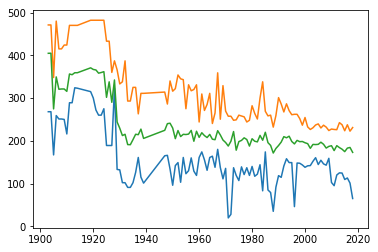

In [17]:
plt.plot(results['Year'], results['Minimum'])
plt.plot(results['Year'], results['Maximum'])
plt.plot(results['Year'], results['Average'])
plt.show()

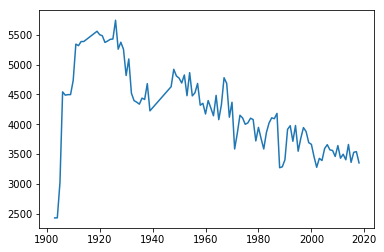

In [18]:
plt.plot(results['Year'], results['Total'])
plt.show()

Finally, we create a nice visualisation of the collected data.

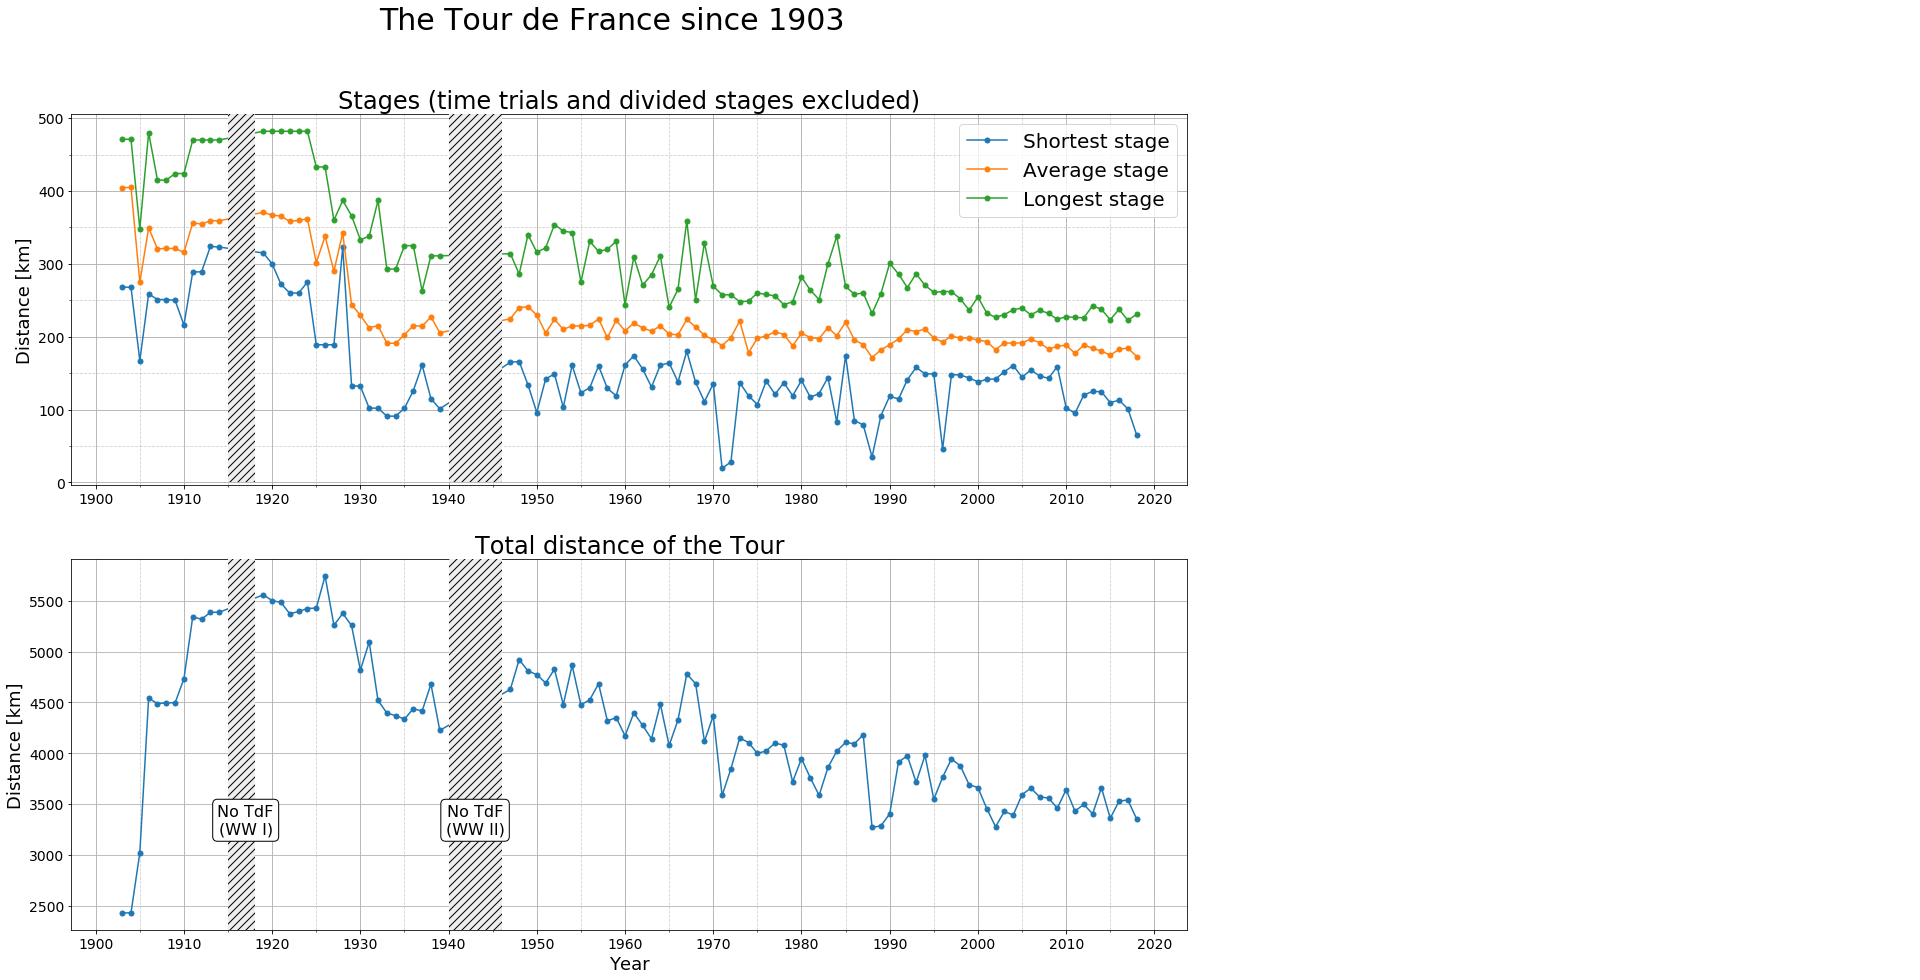

In [19]:
fig, axes = plt.subplots(figsize=(20, 15), nrows=2, ncols=1, sharex=False)
fig.suptitle('The Tour de France since 1903', fontsize=30)

ax = axes[0]
ax.set_title('Stages (time trials and divided stages excluded)', size=24)
ax.set_ylabel('Distance [km]', size=18)
ax.plot(results['Year'], results['Minimum'], linestyle='-', marker='o', markersize=5)
ax.set_label('Shortest stage')
ax.plot(results['Year'], results['Average'], linestyle='-', marker='o', markersize=5)
ax.set_label('Average stage')
ax.plot(results['Year'], results['Maximum'], linestyle='-', marker='o', markersize=5)
ax.set_label('Longest stage')
ax.legend(['Shortest stage', 'Average stage', 'Longest stage'], prop={'size': 20})
ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)

this_year = datetime.date.today().year
end_year = this_year + 10 - this_year % 10
if this_year % 10 == 0:
    end_year -= 9
else:
    end_year += 1

xticks_major = np.arange(1900, end_year, 10)
xticks_minor = np.arange(1900, end_year, 5)
ax.set_xticks(xticks_major)
ax.set_xticks(xticks_minor, minor=True)

yticks_major = np.arange(0, 501, 100)
yticks_minor = np.arange(0, 501, 50)
ax.set_yticks(yticks_major)
ax.set_yticks(yticks_minor, minor=True)


ax.add_patch(patches.Rectangle(
    (1915, 0), 3, ax.get_ylim()[1], facecolor='#eeeeee', alpha=1.0, hatch='///', zorder=10))
ax.add_patch(patches.Rectangle(
    (1940, 0), 6, ax.get_ylim()[1], facecolor='#eeeeee', alpha=1.0, hatch='///', zorder=10))
ax.grid(which='both')
ax.grid(which='minor', alpha=0.6, linestyle='dashed')

ax = axes[1]
ax.set_title('Total distance of the Tour', size=24)
ax.set_xlabel('Year', size=18)
ax.set_ylabel('Distance [km]', size=18)
ax.plot(results['Year'], results['Total'], linestyle='-', marker='o', markersize=5)
ax.annotate('No TdF (World War I)', xy=(1915, 300), xytext=(1918, 300))

ax.add_patch(patches.Rectangle(
    (1915, 0), 3, ax.get_ylim()[1], facecolor='#eeeeee', alpha=1.0, hatch='///', zorder=10))
ax.add_patch(patches.Rectangle(
    (1940, 0), 6, ax.get_ylim()[1], facecolor='#eeeeee', alpha=1.0, hatch='///', zorder=10))

props = dict(boxstyle='round', facecolor='white', alpha=1.0)
ax.text(1917, 3500, 'No TdF\n(WW I)', fontsize=16,
        bbox=props, zorder=15,
        verticalalignment='top',
        horizontalalignment='center')
ax.text(1943, 3500, 'No TdF\n(WW II)', fontsize=16,
        bbox=props, zorder=15,
        verticalalignment='top',
        horizontalalignment='center')


ax.tick_params(axis = 'both', which = 'major', labelsize = 14)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)

xticks_major = np.arange(1900, end_year, 10)
xticks_minor = np.arange(1900, end_year, 5)
ax.set_xticks(xticks_major)
ax.set_xticks(xticks_minor, minor=True)

ax.grid(which='both')
ax.grid(which='minor', alpha=0.6, linestyle='dashed')

fig.savefig('plot.pdf')
plt.show()
plt.close(fig)